In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [205]:
df = pd.read_csv('../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv')

# Time Series Visualization

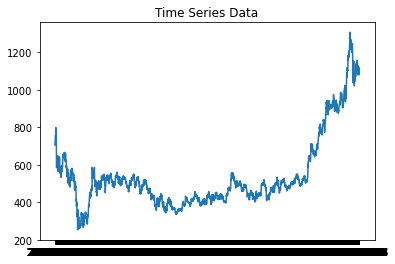

In [103]:
plt.plot(df['Date'], df['Close'])
plt.title('Time Series Data')
plt.show()

# Exogenous Variable Exploration

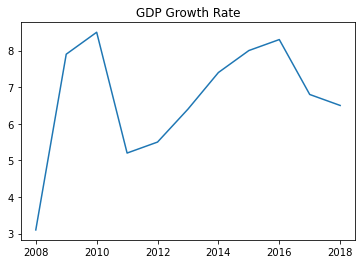

In [98]:
plt.plot(df['Year'], df['GDP Growth Rate'])
plt.title('GDP Growth Rate')
plt.show()

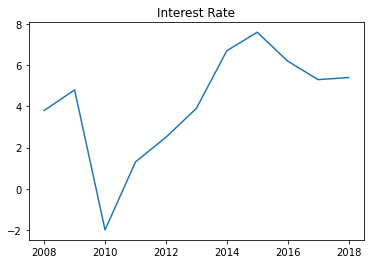

In [97]:
plt.plot(df['Year'], df['Interest Rate'])
plt.title('Interest Rate')
plt.show()

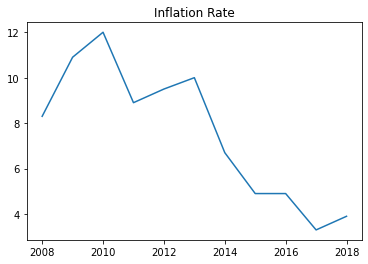

In [96]:
plt.plot(df['Year'], df['Inflation Rate'])
plt.title('Inflation Rate')
plt.show()

# Correlation Analysis

<AxesSubplot:>

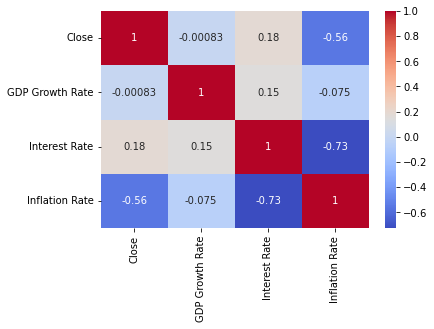

In [233]:
import seaborn as sns
correlation_matrix = df[['Close', 'GDP Growth Rate', 'Interest Rate', 'Inflation Rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


# Seasonal Decomposition

In [110]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index.freq = 'D'  

decomposition = seasonal_decompose(df['Close'])
decomposition.plot()
plt.show()


ValueError: Inferred frequency None from passed values does not conform to passed frequency D

In [33]:
print(df.index)
print(df.index.freq)


DatetimeIndex(['2008-01-01', '2008-01-02', '2008-01-03', '2008-01-04',
               '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10',
               '2008-01-11', '2008-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2708, freq=None)
None


In [26]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,Year,GDP Growth Rate,Interest Rate,Inflation Rate
Date,,,,,,,,,,,
2008-01-01,715.715759,717.944580,702.119629,705.376221,630.190979,4864461.0,Reliance Industries Ltd,2008.0,3.1,3.8,8.3
2008-01-02,707.047913,714.229797,696.225464,708.719543,633.178162,12588005.0,Reliance Industries Ltd,2008.0,3.1,3.8,8.3
2008-01-03,706.304932,725.621826,700.918518,719.108582,642.459778,13939233.0,Reliance Industries Ltd,2008.0,3.1,3.8,8.3
2008-01-04,719.182861,747.861023,719.182861,741.223938,662.217773,16366255.0,Reliance Industries Ltd,2008.0,3.1,3.8,8.3
2008-01-07,736.716675,750.387085,733.051392,747.972473,668.247131,12650730.0,Reliance Industries Ltd,2008.0,3.1,3.8,8.3


In [20]:
df = df.asfreq('D')

In [23]:
df.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Company            0
Year               0
GDP Growth Rate    0
Interest Rate      0
Inflation Rate     0
dtype: int64

In [24]:
df = df.dropna()

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'])
decomposition.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

# Stationarity Check- Augmented Dickey-Fuller (ADF) test

In [111]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'])

In [112]:
print(result)

(0.06506707679433779, 0.9635935251247841, 17, 2690, {'1%': -3.4327832903814204, '5%': -2.8626150481453765, '10%': -2.567342284103315}, 20285.3734968998)


# Lag Analysis- autocorrelation and partial autocorrelation functions

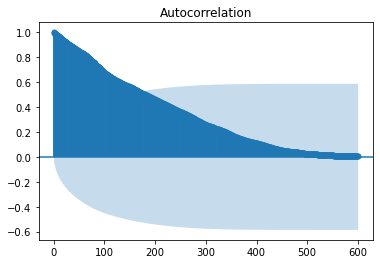

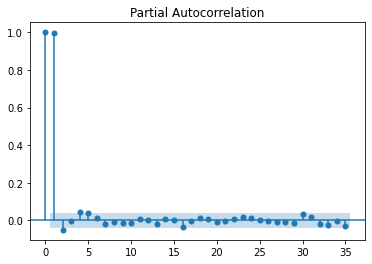

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'],lags=600)
plot_pacf(df['Close']);

# Distribution Analysis
##### Analyze the distribution of the time series variable and exogenous variables. It's important to ensure that the data conforms to modeling assumptions

(array([ 28.,  43.,  83., 186., 378., 326., 448., 484., 170.,  37.,  47.,
         63.,  30.,  13.,  25.,  31.,  15.,  14.,  73.,  60.,  30.,  10.,
          9.,  25.,  28.,  12.,  11.,  15.,  11.,   3.]),
 array([ 252.48172   ,  287.61948347,  322.75724693,  357.8950104 ,
         393.03277387,  428.17053733,  463.3083008 ,  498.44606427,
         533.58382773,  568.7215912 ,  603.85935467,  638.99711813,
         674.1348816 ,  709.27264507,  744.41040853,  779.548172  ,
         814.68593547,  849.82369893,  884.9614624 ,  920.09922587,
         955.23698933,  990.3747528 , 1025.51251627, 1060.65027973,
        1095.7880432 , 1130.92580667, 1166.06357013, 1201.2013336 ,
        1236.33909707, 1271.47686053, 1306.614624  ]),
 <BarContainer object of 30 artists>)

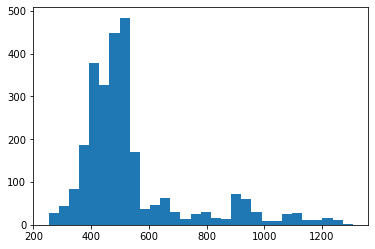

In [114]:
import matplotlib.pyplot as plt
plt.hist(df['Close'], bins=30)

# Cross-Correlation Analysis

In [115]:
cross_corr = df[['Close', 'GDP Growth Rate', 'Interest Rate', 'Inflation Rate']].corr()

In [116]:
print(cross_corr)

                    Close  GDP Growth Rate  Interest Rate  Inflation Rate
Close            1.000000        -0.000829       0.177217       -0.555164
GDP Growth Rate -0.000829         1.000000       0.146277       -0.075371
Interest Rate    0.177217         0.146277       1.000000       -0.727473
Inflation Rate  -0.555164        -0.075371      -0.727473        1.000000


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

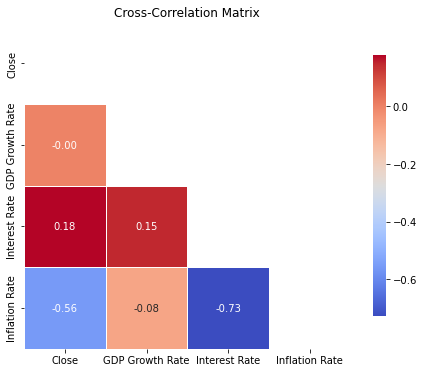

In [118]:
correlation_matrix = df[['Close', 'GDP Growth Rate', 'Interest Rate', 'Inflation Rate']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.8})

plt.title('Cross-Correlation Matrix')
plt.show()

# Identify Outliers with Box Plots

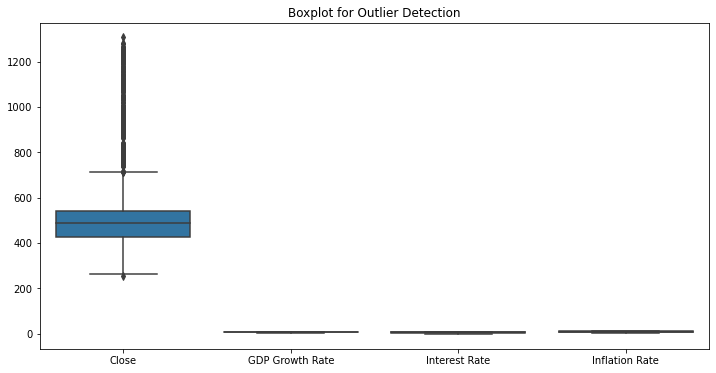

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Close', 'GDP Growth Rate', 'Interest Rate', 'Inflation Rate']])
plt.title('Boxplot for Outlier Detection')
plt.show()

# Handling outliers using IQR method
def handle_outliers_iqr(dataframe, column):
    q1 = dataframe['Close'].quantile(0.25)
    q3 = dataframe['Close'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    dataframe[column] = dataframe[column].apply(lambda x: max(lower_bound, min(upper_bound, x)))

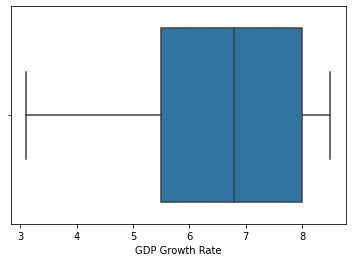

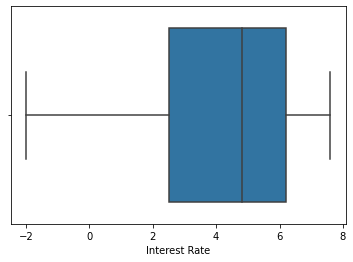

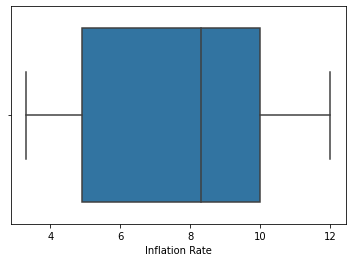

In [120]:
# For exogenous variables
sns.boxplot(x=df['GDP Growth Rate'])
plt.show()

sns.boxplot(x=df['Interest Rate'])
plt.show()

sns.boxplot(x=df['Inflation Rate'])
plt.show()


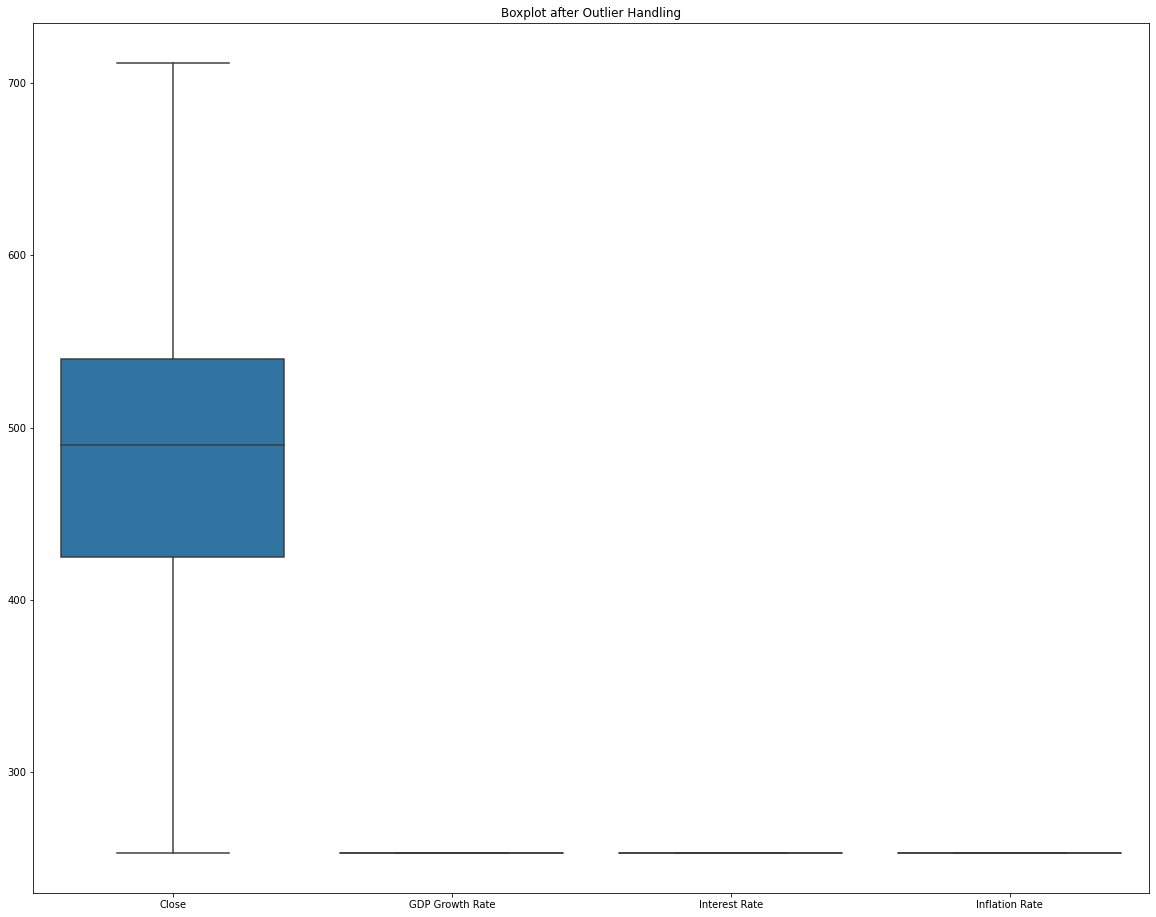

In [121]:
# Handle outliers for each variable
handle_outliers_iqr(df, 'Close')
handle_outliers_iqr(df, 'GDP Growth Rate')
handle_outliers_iqr(df, 'Interest Rate')
handle_outliers_iqr(df, 'Inflation Rate')

# Visualize Boxplots again to confirm outlier handling
plt.figure(figsize=(20, 16))
sns.boxplot(data=df[['Close', 'GDP Growth Rate', 'Interest Rate', 'Inflation Rate']])
plt.title('Boxplot after Outlier Handling')
plt.show()

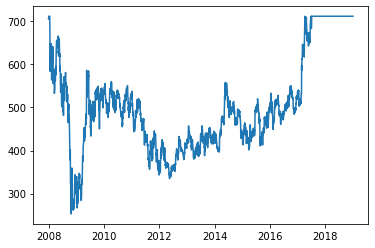

In [123]:
plt.plot(df.index, df['Close'])
plt.show()

# Apply ARIMAX Model

In [206]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Load your time series data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv')

# Define a function to perform ARIMA grid search and return the best model
def arima_grid_search(data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None

    for p, d, q in product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(data, order=order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue

    return best_order

# Define the ranges for p, d, and q
p_values = range(0, 4)  # adjust the range based on your data and expectations
d_values = range(0, 2)  # adjust the range based on your data and expectations
q_values = range(0, 4)  # adjust the range based on your data and expectations

# Perform grid search
best_order = arima_grid_search(df['Close'], p_values, d_values, q_values)

D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [207]:
print(best_order)

(2, 1, 2)


In [208]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [209]:
# Fit ARIMAX model after outlier handling
order = best_order
exog_vars = df[['GDP Growth Rate', 'Interest Rate', 'Inflation Rate']]
model = SARIMAX(df['Close'], exog=exog_vars, order=order)
results = model.fit()

# Print model summary
print(results.summary())

D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2708
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -10300.459
Date:                Mon, 04 Dec 2023   AIC                          20616.918
Time:                        01:35:37   BIC                          20664.146
Sample:                             0   HQIC                         20633.995
                               - 2708                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
GDP Growth Rate     0.7047      5.990      0.118      0.906     -11.036      12.445
Interest Rate       0.8256      5.555      0.149      0.882     -10.062      11.713
Inflation Rate      1.2210      

D:\Programs\anaconda3\Anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


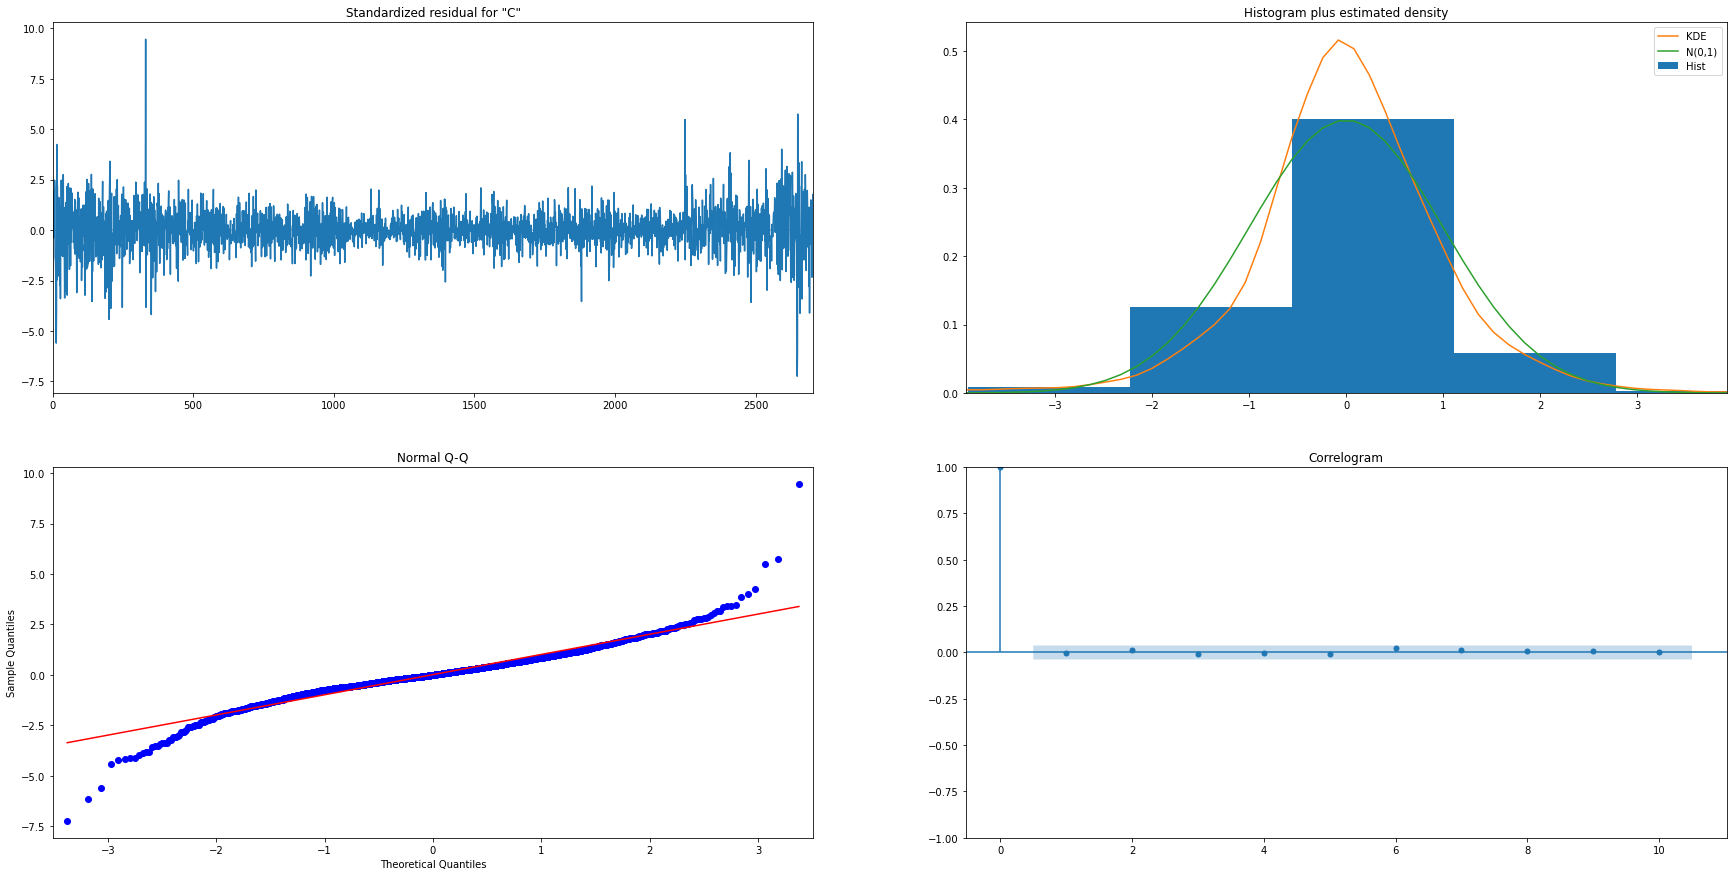

In [210]:
# Plot diagnostics
results.plot_diagnostics(figsize=(30, 15))
plt.show()

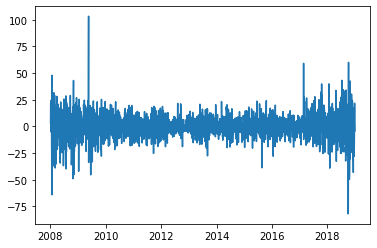

In [211]:
df_stat = df['Close'].diff().dropna()
plt.plot(df_stat)

In [212]:
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(df_stat)
print(result1)

(-12.510027345971816, 2.687070353331069e-23, 16, 2690, {'1%': -3.4327832903814204, '5%': -2.8626150481453765, '10%': -2.567342284103315}, 20264.23310988697)


In [213]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Company,Year,GDP Growth Rate,Interest Rate,Inflation Rate
Date,,,,,,,,,,,
2008-01-01,715.715759,717.944580,702.119629,705.376221,630.190979,4864461.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-02,707.047913,714.229797,696.225464,708.719543,633.178162,12588005.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-03,706.304932,725.621826,700.918518,719.108582,642.459778,13939233.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-04,719.182861,747.861023,719.182861,741.223938,662.217773,16366255.0,Reliance Industries Ltd,2008,3.1,3.8,8.3
2008-01-07,736.716675,750.387085,733.051392,747.972473,668.247131,12650730.0,Reliance Industries Ltd,2008,3.1,3.8,8.3


In [214]:
test = pd.read_csv('../Datasets_1/Testing Dataset/Reliance_Industries_Ltd.csv')

In [215]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company,Year,GDP Growth Rate,Interest Rate,Inflation Rate
0,2019-01-01,1114.683960,1116.714722,1099.676147,1110.473877,1089.558228,4498087.0,Reliance Industries Ltd,2019,3.9,6.9,3.7
1,2019-01-02,1104.034912,1116.417480,1090.661621,1096.010864,1075.367554,7212697.0,Reliance Industries Ltd,2019,3.9,6.9,3.7
2,2019-01-03,1097.100586,1104.133911,1079.864014,1082.489136,1062.100586,7517041.0,Reliance Industries Ltd,2019,3.9,6.9,3.7
3,2019-01-04,1087.095459,1094.079224,1070.948486,1088.333740,1067.835083,8545382.0,Reliance Industries Ltd,2019,3.9,6.9,3.7
4,2019-01-07,1096.605225,1107.947754,1090.661621,1094.376465,1073.763916,5565822.0,Reliance Industries Ltd,2019,3.9,6.9,3.7


In [221]:
# Forecast using the fitted model
forecast_steps = 10  # Adjust based on your requirements
forecast = results.get_prediction(start=1 ,end=142, exog=exog_vars.tail(243))
print(forecast.predicted_mean)

Date
2008-01-02    705.383099
2008-01-03    708.996391
2008-01-04    719.948809
2008-01-07    742.857989
2008-01-08    747.761349
                 ...    
2008-07-22    533.908535
2008-07-23    531.474951
2008-07-24    561.422432
2008-07-25    570.178844
2008-07-28    525.998560
Name: predicted_mean, Length: 142, dtype: float64


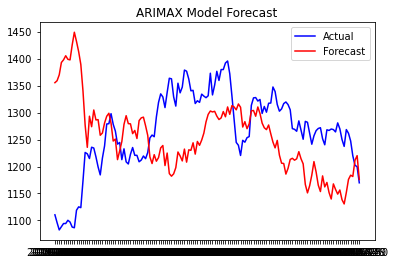

In [222]:
plt.plot(test['Date'].head(142),test['Close'].head(142), label='Actual', color='blue')
plt.plot( test['Date'].head(142),forecast.predicted_mean+650, label='Forecast', color='red')
# plt.fill_between(forecast.index, lower_bound, upper_bound, color='pink', alpha=0.3)
plt.title('ARIMAX Model Forecast')
plt.legend()
plt.show()

Date
2008-01-02    705.383099
2008-01-03    708.996391
2008-01-04    719.948809
2008-01-07    742.857989
2008-01-08    747.761349
                 ...    
2008-12-19    335.378717
2008-12-22    333.622310
2008-12-23    316.977586
2008-12-24    311.949158
2008-12-26    308.578874
Name: predicted_mean, Length: 242, dtype: float64


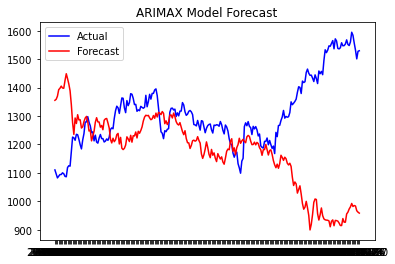

In [224]:
forecast_steps = 10  # Adjust based on your requirements
forecast = results.get_prediction(start=1 ,end=242, exog=exog_vars.tail(243))
print(forecast.predicted_mean)
plt.plot(test['Date'].head(242),test['Close'].head(242), label='Actual', color='blue')
plt.plot( test['Date'].head(242),forecast.predicted_mean+650, label='Forecast', color='red')
# plt.fill_between(forecast.index, lower_bound, upper_bound, color='pink', alpha=0.3)
plt.title('ARIMAX Model Forecast')
plt.legend()
plt.show()

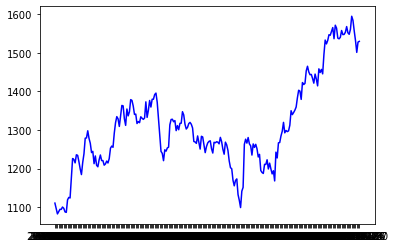

In [225]:
plt.plot(test['Date'],test['Close'], label='Actual', color='blue')
plt.show()

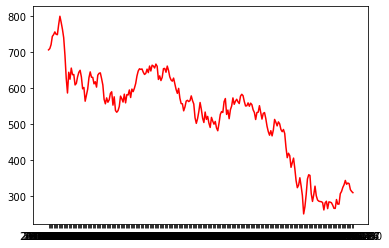

In [226]:
plt.plot( test['Date'],forecast.predicted_mean, label='Forecast', color='red')
plt.show()

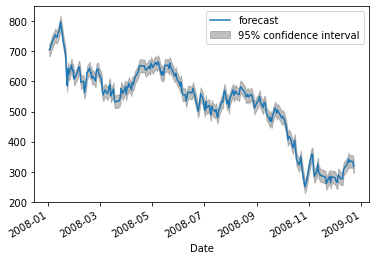

In [227]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results,start=1,end=240,dynamic=False,alpha=0.05);

In [228]:
pred = forecast.predicted_mean
print(pred)

Date
2008-01-02    705.383099
2008-01-03    708.996391
2008-01-04    719.948809
2008-01-07    742.857989
2008-01-08    747.761349
                 ...    
2008-12-19    335.378717
2008-12-22    333.622310
2008-12-23    316.977586
2008-12-24    311.949158
2008-12-26    308.578874
Name: predicted_mean, Length: 242, dtype: float64


In [229]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual_values = test['Close'].head(242)

# Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, pred)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 668104.2159243101
Mean Absolute Error (MAE): 782.976650718691
Root Mean Squared Error (RMSE): 817.3764224176705


In [230]:
mape = np.mean(np.abs((pred-test['Close'].head(242)) / test['Close'].head(242))) * 100

D:\Programs\anaconda3\Anaconda\lib\site-packages\pandas\core\indexes\base.py:4024: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [231]:
print(f'Mean Absolute Percentage Error (MAPE): {mape}')

Mean Absolute Percentage Error (MAPE): nan
